# Sociome Data Commons Demo

What are we going to show?
* Adding and Computing Spatial Metrics
* Visualization
* Publishing/Releasing Data
* Address Sociome Lookup

## Example 1. Loading The Basic Data

In [1]:
from city import CityScape #loads the geography of a city
city = CityScape.chicago() #configured to load only 10k addresses in chicago

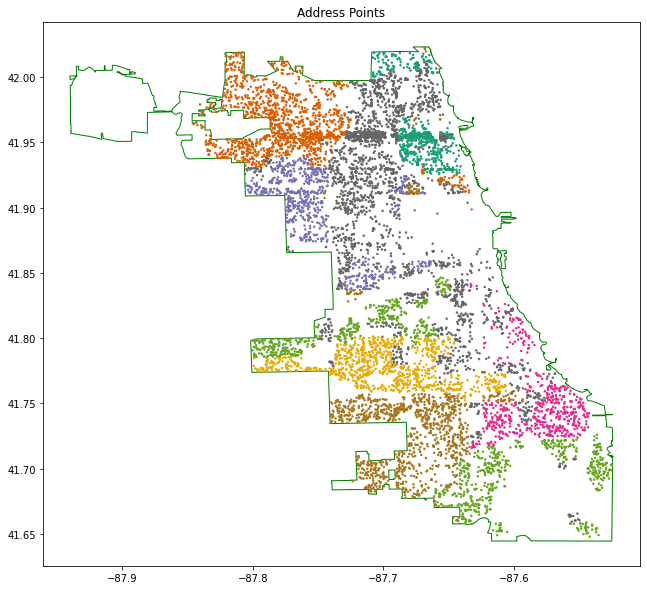

In [2]:
city.visualize()

You can import spatial "metrics" to overlay on these addresses.

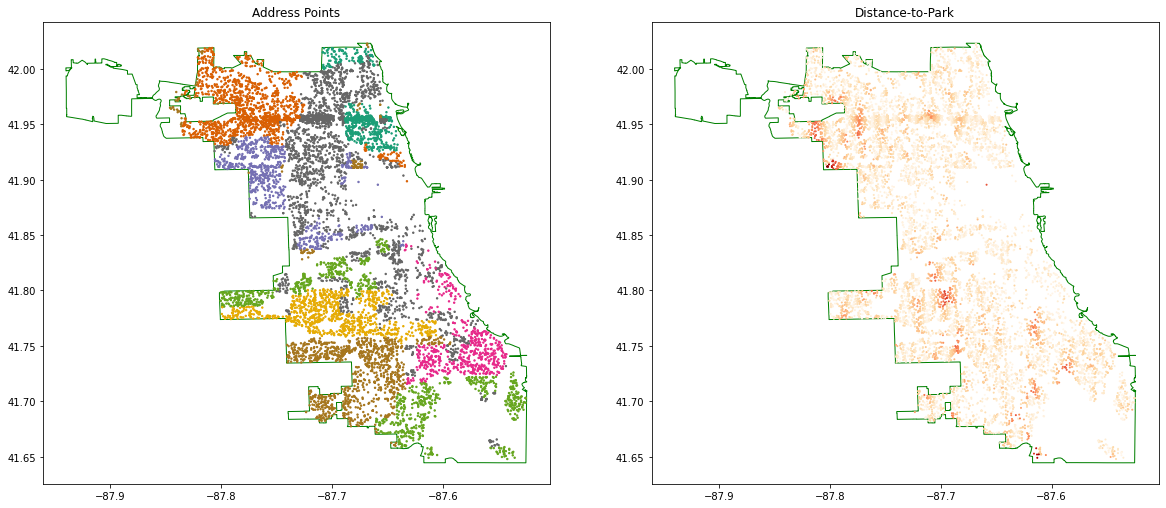

In [3]:
from data import *
city.add_metric('Distance-to-Park', get_chicago_parks_distance())

city.visualize()

## Comparing Spatial Metrics
The system allows you to compare any number of spatial metrics but you can only visualize 3 at a time.

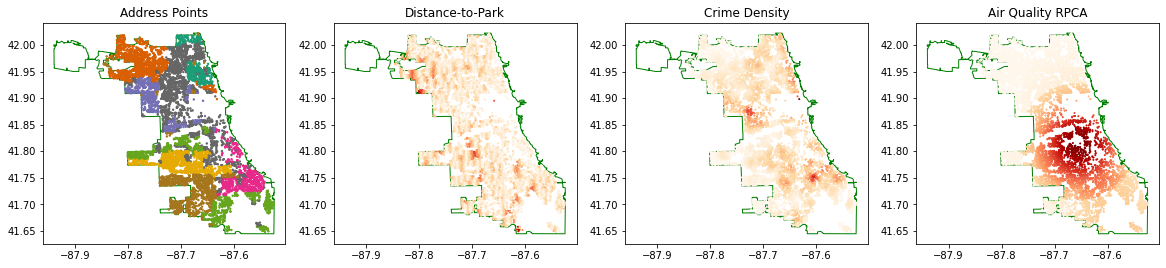

In [4]:
city.add_metric('Crime Density', get_chicago_crime())
city.add_metric('Air Quality RPCA',  get_air_quality_rpca_8um6())
city.visualize()

You can add more metrics for comparison.

/Users/sanjaykrishnan/Documents/sociome-dc/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1378: FutureWarning: Passing 'suffixes' which cause duplicate columns {'y_x', 'x_x', 'fx_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


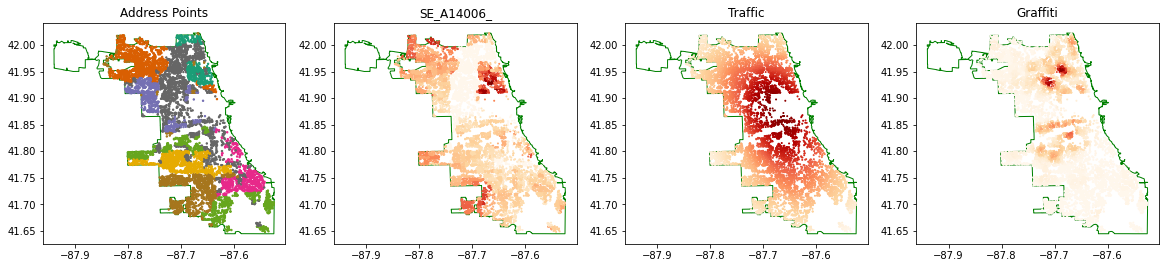

In [5]:
city.add_metric('SE_A14006_')#Also includes ACS code!
city.add_metric('Traffic', get_traffic())
city.add_metric('Graffiti', get_graffiti())

city.visualize(metrics=['SE_A14006_', 'Traffic', 'Graffiti'])

## Adding New Metrics

It's really easy to add new metrics to the system. Let's show how to do this with an example. Suppose, we believe that the proximity to construction affects outcomes. We can use the building permit API to download the data.

In [6]:
import pandas as pd

building_permit_api = 'https://data.cityofchicago.org/resource/building-permits.json'
building_permit = pd.read_json(building_permit_api)
building_permit.head()

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,...,contact_11_name,contact_11_city,contact_11_state,contact_11_zipcode,contact_12_type,contact_12_name,contact_12_city,contact_12_state,contact_12_zipcode,pin8
0,1830273,100190752,PERMIT - SIGNS,SIGN PERMIT,2007-10-16T00:00:00.000,2008-03-05T00:00:00.000,1970-01-01 00:02:21,6349,S,COTTAGE GROVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2060019,100296510,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2009-06-15T00:00:00.000,2009-06-15T00:00:00.000,1970-01-01 00:00:00,10000,N,BESSIE COLEMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1671981,100108067,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2006-04-17T00:00:00.000,2006-04-17T00:00:00.000,1970-01-01 00:00:00,7535,N,HERMITAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2832499,100696131,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-03-20T00:00:00.000,2017-03-20T00:00:00.000,1970-01-01 00:00:00,150,N,RIVERSIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3053734,100830913,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2019-07-17T00:00:00.000,2019-07-17T00:00:00.000,1970-01-01 00:00:00,4001,N,RAVENSWOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's filter the data to just substantial permits.

In [7]:
filter = (building_permit['permit_type'] == 'PERMIT - RENOVATION/ALTERATION') | \
			 (building_permit['permit_type'] == 'PERMIT - NEW CONSTRUCTION') | \
			 (building_permit['permit_type'] == 'PERMIT - WRECKING/DEMOLITION')
building_permit = building_permit[filter]

Then, we can add a new metric to the system

In [8]:
gdf = gpd.GeoDataFrame(building_permit, geometry=gpd.points_from_xy(building_permit.longitude, building_permit.latitude))
metric= SpatialDensityFunction(gdf)

/Users/sanjaykrishnan/Documents/sociome-dc/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1378: FutureWarning: Passing 'suffixes' which cause duplicate columns {'y_x', 'x_x', 'fx_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


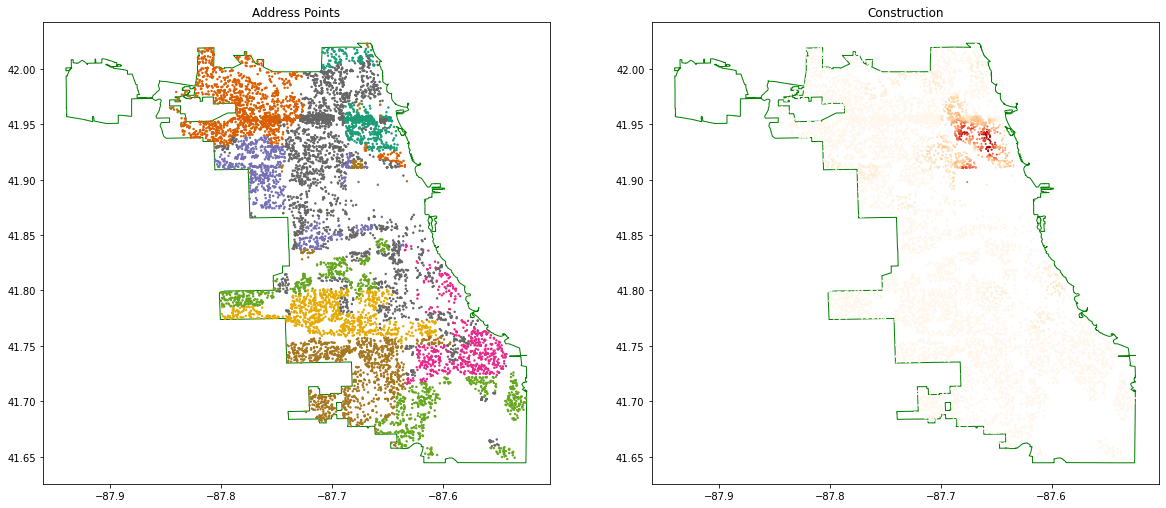

In [9]:
city.add_metric('Construction', metric)

city.visualize(metrics=['Construction'])

We can even get some data on what contruction is correlated with

In [10]:
city.corr('Construction')

{('Construction',
  'Distance-to-Park'): array([[ 1.        , -0.13550243],
        [-0.13550243,  1.        ]]),
 ('Construction',
  'Crime Density'): array([[1.        , 0.07272761],
        [0.07272761, 1.        ]]),
 ('Construction',
  'Air Quality RPCA'): array([[ 1.        , -0.17349754],
        [-0.17349754,  1.        ]]),
 ('Construction',
  'SE_A14006_'): array([[1.        , 0.44775473],
        [0.44775473, 1.        ]]),
 ('Construction',
  'Traffic'): array([[1.        , 0.37377978],
        [0.37377978, 1.        ]]),
 ('Construction',
  'Graffiti'): array([[1.        , 0.42953184],
        [0.42953184, 1.        ]]),
 ('Construction',
  'Construction'): array([[1., 1.],
        [1., 1.]])}

# Publishing Data
The notebook interface is convenient for programmers but for everyone else, we support an easy interface for exploring the data. We use the Kepler API.

In [11]:
city.to_kepler('map.html', ['Crime Density'])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to map.html!


This code generates an interactive map of the data.

## Address Lookup
Not really implemented...

In [14]:
city.get_address('477 WEST DEMING PLACE','Distance-to-Park')

9977    274.750583
Name: Distance-to-Park, dtype: float64

In [16]:
city.quantile('Distance-to-Park')

array([  1.21836746,  61.65590077, 117.1093762 , 178.79800737,
       243.85541219, 311.59567194, 384.23283237, 483.78645831,
       616.2254554 , 815.25511359])